In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import metrics
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

%load_ext tensorboard

In [2]:
from tensorflow import keras
print(tf.__version__)


2.13.1


In [3]:
import os
from os.path import isfile, join
import re


mypath = 'dataset_42028assg1_13918471'
categories = ['!', ')', '[', '+', '=', 'cos', 'div', 'sum', 'tan', 'times']
dataset = []
img_index_arr = []
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

def load_data():
    for category in categories:
        path = os.path.join(mypath, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0)
                new_array = cv2.resize(img_array, (28,28))
                dataset.append(new_array)
                img_index_arr.append(class_num)
            except Exception as e:
                print(e)


In [4]:
load_data()

!
)
+
sum


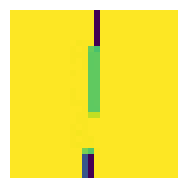

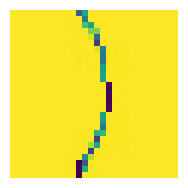

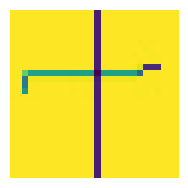

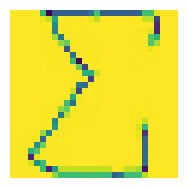

In [5]:
datasetArr = np.array(dataset)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(dataset[0])
print(categories[img_index_arr[0]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)
ax1.axis('off')
ax1.imshow(dataset[500])
print(categories[img_index_arr[500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax1.axis('off')
ax1.imshow(dataset[1500])
print(categories[img_index_arr[1500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax1.imshow(dataset[3500])
print(categories[img_index_arr[3500]])


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetArr, img_index_arr) 


In [25]:
X_val = np.array(X_train[:500] /255.0)
Y_val = np.array(Y_train[:500]) 

X_train = np.array(X_train [500:] /255.0)
Y_train = np.array(Y_train [500:])

X_test = np.array(X_test /255.0)
Y_test = np.array(Y_test)

print(X_train[4])


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.    

In [26]:
# plt.imshow(data_train[0])

print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(3250, 28, 28)
(500, 28, 28)
(1250, 28, 28)


In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, Y_train, epochs=13,validation_data=(X_val, Y_val))

In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


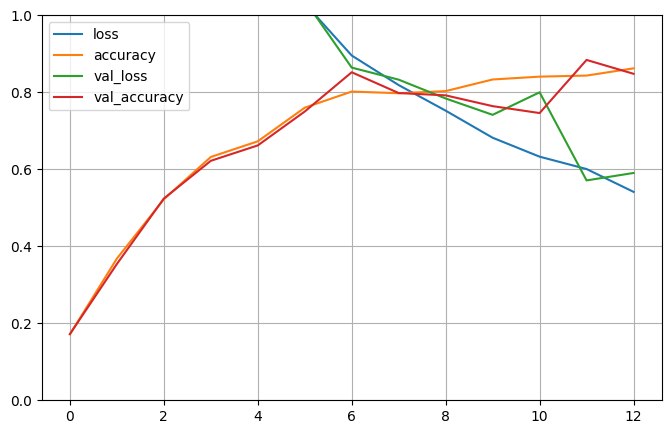

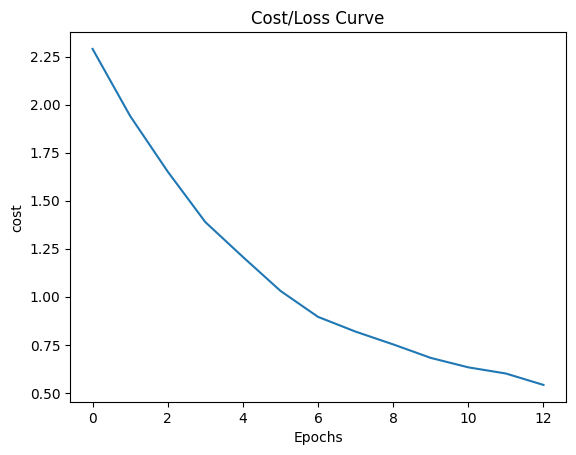

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [29]:
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.8528


[0.5731226801872253, 0.8528000116348267]